# Scientific python with Scipy
### Author : Jérémy Vachier

Scipy is the library for scientific computing. With Scipy we can interpolate, integrate, optimize, do image processing, statistics, use special functions, etc.

Scipy is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and scipy work hand in hand.


## Interaction with Numpy

See the lecture on Numpy

## Different libraries

- scipy.cluster -> Vector quantization / Kmeans

- scipy.constants -> Physical and mathematical constants

- scipy.fftpack -> Fourier transform

- scipy.integrate -> Integration routines

- scipy.io -> Data input and output

- scipy.ndimage -> n-dimensional image package

- scipy.odr -> Orthogonal distance regression

- scipy.signal -> Signal processing

- scipy.sparse -> Sparse matrices

- scipy.spatial -> Spatial data structures and algorithms

- scipy.special -> Any special mathematical functions

- ### scipy.linalg -> Linear algebra routines **
- ### scipy.optimize -> Optimization **
- ### scipy.stats -> Statistics **
- ### scipy.interpolate -> Interpolation **

## Linear algebra operations: scipy.linalg

Why you need to know a bit of linear algebra ?

Differential equations or system of differential equations, e.g. really useful to describe the population dynamics. We can also use the matrices to do image processing and biostatistics. So it is always good to know a bit of linear algebra.

In [141]:
from scipy import linalg
import numpy as np

## Creating Matrices by using Numpy
A = np.matrix(np.random.random((2,2)))
B = np.mat(np.random.random((10,5)))
C = np.mat([[3,4],[5,6]])

print('A: '+str(A)+'\n'+'B: '+str(B)+'\n'+'C: '+str(C))

A: [[ 0.60482195  0.39499287]
 [ 0.3746054   0.06307277]]
B: [[ 0.42895903  0.71972093  0.76803089  0.19436815  0.86287077]
 [ 0.02872195  0.90212882  0.23654588  0.12858426  0.31787579]
 [ 0.8487613   0.83229775  0.34565135  0.23997119  0.53578755]
 [ 0.27146694  0.03443087  0.62708559  0.52020046  0.04195581]
 [ 0.75747277  0.98834976  0.80140096  0.34398109  0.33539124]
 [ 0.3515714   0.44294568  0.57949344  0.61756091  0.17711749]
 [ 0.86498179  0.71027069  0.17063169  0.85508266  0.01985662]
 [ 0.64168373  0.16233435  0.25755049  0.34260646  0.00614414]
 [ 0.43855106  0.79704411  0.67566494  0.54502309  0.56422699]
 [ 0.01398415  0.60897714  0.98856638  0.22410702  0.58721772]]
C: [[3 4]
 [5 6]]


In [142]:
## Basic operation on the Matrix
A.I #inverse
linalg.inv(A)

array([[-0.57433562,  3.59677354],
       [ 3.41112685, -5.50746039]])

In [143]:
A.T # transpose matrix
A.H # conjugate transposition
np.trace(A) # trace

0.66789472512846759

$||A||_F=\sqrt{\sum\limits_{i=1}^m\sum\limits_{j=1}^n|a_{ij}|^2} $ -- Frobenius norm

In [144]:
linalg.norm(A) #Frobenius norm
linalg.norm(A,1) # max column sum
linalg.norm(A,np.inf) # max row sum

0.9998148256060627

In [145]:
np.linalg.matrix_rank(C) # Matrix rank
linalg.det(A) # Determinant

-0.1098186659557528

## Optimization and fit: scipy.optimize

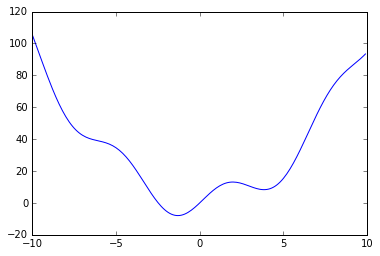

In [146]:
from scipy import optimize
import matplotlib.pyplot as plt

#find the minimum of a function

def f(x):
    return x**2 + 10*np.sin(x)

x = np.arange(-10, 10, 0.1)

plt.plot(x, f(x)) 

plt.show()

The general and efficient way to find a minimum for this function is to conduct a gradient descent starting from a given initial point. The Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm is a good way of doing this


In [147]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-1.30644003])

A possible issue with this approach is that, if the function has local minima the algorithm may find these local minima instead of the global minimum depending on the initial point


In [148]:
optimize.fmin_bfgs(f, 3, disp=0) #disp = 0 remove the explanation part

array([ 3.83746663])

In [149]:
optimize.fmin_bfgs(f, 3)

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([ 3.83746663])

To find the global minimum, the simplest algorithm is the brute force algorithm, in which the function is evaluated on each point of a given grid. To find the local minimum, let's constraint the variable to the interval (0, 10).


In [150]:
grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,)) #f is the function and (grid,) is the range
xmin_local = optimize.fminbound(f, 0, 10) # we look f(x), where 0<x<10
print(xmin_global,xmin_local)

[-1.30641113] 3.8374671195


### Roots of a scalar function

To find a root, i.e. a point where f(x) = 0, we use scipy.optimize.fsolve()

In [151]:
root = optimize.fsolve(f, 1)  # our initial guess is 1
root

array([ 0.])

Only one root is found. The plot of f reveals that there is a second root around -2.5. We find the exact value of it by adjusting our initial guess

In [152]:
root2 = optimize.fsolve(f, -2.5)
root2

array([-2.47948183])

### Curve fitting

In [153]:
np.random.randn(2) #“standard normal” distribution

array([ 0.4500013 ,  0.51547953])

In [154]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size) #xdata.size give the dimensions
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

Then we can use scipy.optimize.curve_fit() to find a and b

In [155]:
guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
print(params, params_covariance)

[  0.98677818  10.29472521] [[  1.45391753e-05  -4.42848480e-12]
 [ -4.42848480e-12   7.42547659e-02]]


### Exercice (easy)

From the previous system, plot on the same graphics f(x), the curve fit result, the minima and the roots.<br>
Add labels + legend. For f(x) use a blue line, red dash for curve fit, dot markers for the minima and triangle markers for roots.

### Exercice (medium)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius) 

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

- Plot these temperature extremes.
- Compute the mean value for each month and plot it.
- Define a function that can describe min and max temperatures. Hint: this function has to have a period of 1 year. Hint: include a time offset.
- Fit this function to the data with scipy.optimize.curve_fit().
- Print the params. Use it to plot the fit curve.
- Plot the result. Add labels : name of the month + legend. Define the degree Celcius.
Is the fit reasonable? If not, why?
- Is the time offset for min and max temperatures the same within the fit accuracy?

### Exercice (hard)


The six-hump camelback function : $f(x,y)=(4−2.1x^2+\frac{x^4}{3})x^2+xy+(4y^2−4)y^2$ has multiple global and local minima. Find the global minima of this function.

Hints :

- Variables can be restricted to -2 < x < 2 and -1 < y < 1.
- Use numpy.meshgrid() and plt.imshow() to find visually the regions.
- Use scipy.optimize.fmin_bfgs() or another multidimensional minimizer.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of (x, y) = (0, 0) ?

##  Statistics and random numbers: scipy.stats

### Histogram and probability density function

[-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.
  3.5  4.   4.5]


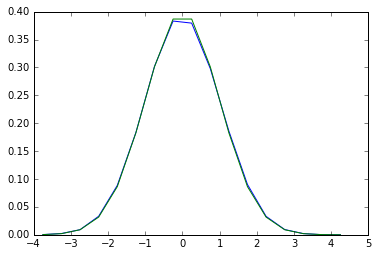

In [156]:
from scipy import stats
import numpy as np

a = np.random.normal(size=100000) #Normal distribution
bins = np.arange(-4, 5,0.5)
print(bins)
histogram = np.histogram(a, bins=bins, normed=True)[0]
bins = 0.5*(bins[1:] + bins[:-1])


b = stats.norm.pdf(bins)  # norm is a distribution
plt.plot(bins, histogram)
plt.plot(bins, b)
plt.show()

### Exercise (easy)

Generate 1000 random variates from a gamma distribution with a shape parameter of 1, then plot a histogram from those samples. Can you plot the pdf on top (it should match)?

### Statistical tests

A statistical test is a decision indicator. For instance, if we have two sets of observations, that we assume are generated from Gaussian processes, we can use a T-test to decide whether the two sets of observations are significantly different. It is a two-sample location test which is used to test the hypothesis that two populations have equal means.

In [157]:
a = np.random.normal(0, 1, size=100) #normal distribution mu = 0, sigma = 1
b = np.random.normal(1, 1, size=10)
print(str(a)+'\n'+str(b))

[ 0.43509539  0.6434335   0.14108299  1.29387089  1.62502671  0.72753258
  0.10865894  1.54288666  1.79463806 -2.39706763  1.30446146  1.36045045
 -2.35542725  0.11060919 -0.97003093  0.77549502  0.02235318 -0.45780131
 -0.81803001  2.13423867  1.23044638  0.17337574  1.139043   -0.51422305
 -0.21078491  0.97206518  0.78787869 -2.37780781 -0.70240161  0.68909485
  0.86469732  2.1708985  -1.1972964  -0.14855563  1.65912363 -2.22927028
  0.49651898  0.92278477 -0.8112535   1.66161686  0.32253929  1.19044558
 -0.49524767  0.01001103  1.87187962 -0.69621566 -1.02517319  0.13479783
 -0.93974838  0.48862991  1.15893115 -0.23397781 -0.00677132 -0.51392379
 -0.21233073 -0.7942119   2.27954256  0.7678537   0.19332355 -0.30447308
 -2.65995274  0.97754932  0.35011735  0.18093291  0.5237991   0.1445082
  0.38489054  0.23199841 -0.34922507  0.68442154  1.13932756  2.34228909
  0.90732542 -0.66164086 -0.73859457 -2.65813964 -0.913531    0.15939779
 -0.6694766   1.07658091  1.04457734  0.03324822 -0.

In [158]:
#print(a,b)
stats.ttest_ind(a, b)  

Ttest_indResult(statistic=-2.7375253463819833, pvalue=0.0072409768506509781)

- The statistic value : it is a number the sign of which is proportional to the difference between the two random processes and the magnitude is related to the significance of this difference.
- The p value : the probability of both processes being identical. If it is close to 1, the two process are almost certainly identical. The closer it is to zero, the more likely it is that the processes have different means.


## Interpolation: scipy.interpolate

The scipy.interpolate is useful for fitting a function from experimental data and thus evaluating points where no measure exists.

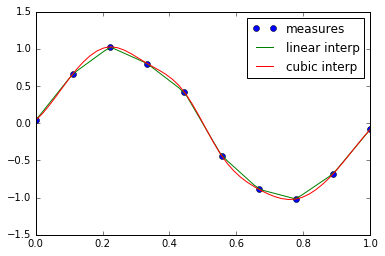

In [159]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

## Let create experimental data
measured_time = np.linspace(0, 1, 10)
noise = (np.random.random(10)*2 - 1) * 1e-1 #10 = number of variables - values from [-0.1;0.1]
measures = np.sin(2 * np.pi * measured_time) + noise

## The scipy.interpolate.interp1d class can build a linear interpolation function
linear_interp = interp1d(measured_time, measures) #comparaison between measured_time and measures
#linear_interp is a function


## Then the scipy.interpolate.linear_interp instance needs to be evaluated at the time of interest
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)

## A cubic interpolation can also be selected by providing the kind optional keyword argument
cubic_interp = interp1d(measured_time, measures, kind='cubic') 
#kind = kind of interpretation (‘linear’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic, ‘cubic’ where ‘slinear’, 
#‘quadratic’ and ‘cubic’ refer to a spline interpolation of first, second or third order)
cubic_results = cubic_interp(computed_time)

plt.plot(measured_time, measures, 'o', ms=6, label='measures') #ms = size of the markers
plt.plot(computed_time, linear_results, label='linear interp')
plt.plot(computed_time, cubic_results, label='cubic interp')
plt.legend()
plt.show()

## Exercice

Story Name: Brain Size and Intelligence

Abstract: Are the size and weight of your brain indicators of your mental
capacity? In this study by Willerman et al. (1991) the researchers use Magnetic
Resonance Imaging (MRI) to determine the brain size of the subjects. The
researchers take into account gender and body size to draw conclusions about the
connection between brain size and intelligence.

- IQ = intelligence quotient
- FSIQ = full scale intelligence quotient
- VIQ = verbal intelligence quotient
- PIQ = performance intelligence quotient

### Section 1 : Introduction
1) By using pandas read data from brain_size.csv <br>
2) Print the shape of the data, shows columns and print the column with the name gendre<br>
3) Group data : split the dataframeon values of categorical variables : here gender and put that into grou_gender. Then compute the mean.

### Section 2 : Mean, sum and plot
1) What is the mean value for VIQ for the full population ?<br>
2) How many males/females were included in this study ?<br> Hint use 'tab completion' to find out the methods that can be called, instead of 'mean'.<br>
3) What is the average value of MRI counts expressed in log units, for males and females ?

### Section 3 : Statistics and test
1) Test the value of a population mean. Use scipy.stats.ttest_1samp(), which tests if the population mean of data is likely to be equel to a given value. Do that for 'VIQ' for a given value : 0.<br>
2) Test for difference across population. Use scipy.stats.ttest_ind() to test if the difference of the mean VIQ between male and female is significant.<br>
3) Repeated measurements on the same individuals. Test if FSIQ and PIQ are significantly different. Plot the result by using boxplot.<br>
Warning : This method forgets about the link between FSIQ and PIQ. They are measured on the same induviduals.<br>
4) To remove that redo the previous test by using a paired test. Use scipy.stats.ttes_rel(). Plot the result by using boxplot.<br>
5) Substract PIQ to FSIQ. Test if the population mean data is likely to be equal to a given value 0. PLot the result and compare it to the previous question. What do you conclude ?

### Bonus
- Test the difference between weights in males and females.
- Use non parametric statistics to test the difference between VIQ in males and females.<br>
What do you conlude ? Is the difference between in males and females are different ?


In [160]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".") 
#na_values = Additional strings to recognize as NA/NaN. If dict passed, specific per-column NA values. 

In [161]:
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143,73.3,1038437
3,4,Male,133,129,128,172,68.8,965353
4,5,Female,137,132,134,147,65.0,951545
5,6,Female,99,90,110,146,69.0,928799
6,7,Female,138,136,131,138,64.5,991305
7,8,Female,92,90,98,175,66.0,854258
8,9,Male,89,93,84,134,66.3,904858
9,10,Male,133,114,147,172,68.8,955466


In [162]:
data.shape    # 40 rows and 8 columns

(40, 8)

In [163]:
data.columns  # It has columns   

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [164]:
print(data['Gender']) # Columns can be addressed by name

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [165]:
data[data['Gender'] == 'Female']['VIQ'].mean() #take the mean for VIQ female

109.45

In [166]:
pandas.DataFrame.describe(data) #contain lot of information for a big dataframe

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,40.000000
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,908755.000000
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,72282.048931
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,790619.000000
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,855918.500000
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,905399.000000
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,950078.000000
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1079549.000000


In [167]:
groupby_gender = data.groupby('Gender')
# groupby_gender is an object

In [186]:
for gender, value in groupby_gender['VIQ']:#here we just look the gender and the associated value, we compute the mean
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


In [187]:
groupby_gender.mean()#we apply mean on all the tab

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


In [188]:
groupby_gender.size()

Gender
Female    20
Male      20
dtype: int64

In [189]:
groupby_gender.count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,20,20,20,20,20,20,20
Male,20,20,20,20,18,19,20


Boxplot : Make a box and whisker plot for each column of x or each vector in sequence x. The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Flier points are those past the end of the whiskers.

/Users/jeremy/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3022: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


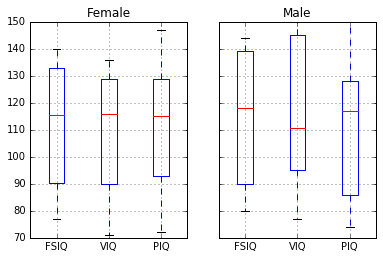

In [190]:
groupby_gender.boxplot(column=['FSIQ', 'VIQ', 'PIQ'])
plt.show()

In [191]:
for gender, value in groupby_gender['MRI_Count']:
    print((gender, np.log(value.mean())))

('Female', 13.667769658201751)
('Male', 13.769315194386104)


/Users/jeremy/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3022: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


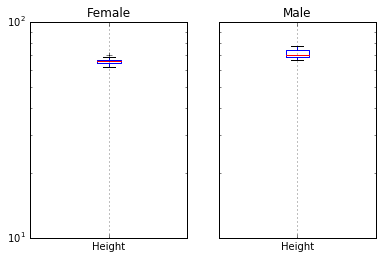

In [193]:
#groupby_gender.boxplot(column=['MRI_Count'])
groupby_gender.boxplot(column=['Height'])
plt.yscale('log')
plt.show()

In [175]:
from scipy import stats
stats.ttest_1samp(data['VIQ'], 0)  #ttest_1samp calculate the T-test for the mean of ONE group of scores.

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [194]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq) #ttest_ind calculate the T-test for the means of two independent samples of scores.

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

In [177]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

/Users/jeremy/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


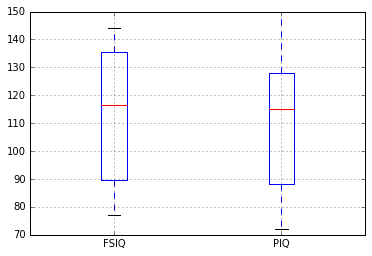

In [178]:
data.boxplot(column=['FSIQ', 'PIQ'])
plt.show()

In [179]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])  

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

In [180]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

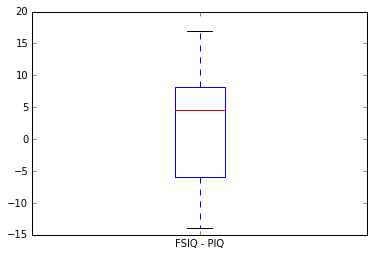

In [181]:
plt.boxplot(data['FSIQ'] - data['PIQ'])
plt.xticks((1, ), ('FSIQ - PIQ', ))
plt.show()

# Biblio
- http://python-scientific-lecture-notes.developpez.com/tutorial/getting-started-python-science/#LI-E
- http://www.scipy-lectures.org/packages/
- https://www.datacamp.com/community/blog/python-scipy-cheat-sheet

## Solution exercice easy

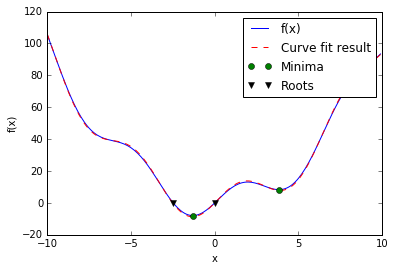

In [182]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.1)

def f(x):
    return x**2 + 10*np.sin(x)

grid = (-10, 10, 0.1)
xmin_global = optimize.brute(f, (grid,))
xmin_local = optimize.fminbound(f, 0, 10)
root = optimize.fsolve(f, 1)  # our initial guess is 1
root2 = optimize.fsolve(f, -2.5)

xdata = np.linspace(-10, 10, num=20)
np.random.seed(1234)
ydata = f(xdata) + np.random.randn(xdata.size)

def f2(x, a, b):
    return a*x**2 + b*np.sin(x)

guess = [2, 2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, f(x), 'b-', label="f(x)")
ax.plot(x, f2(x, *params), 'r--', label="Curve fit result")
xmins = np.array([xmin_global[0], xmin_local])
ax.plot(xmins, f(xmins), 'go', label="Minima")
roots = np.array([root, root2])
ax.plot(roots, f(roots), 'kv', label="Roots")
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

## Solution exercice medium

[ 27.62925851 -10.63955647  -0.22590566] [-37.71075225 -25.20712457  -0.65355893]


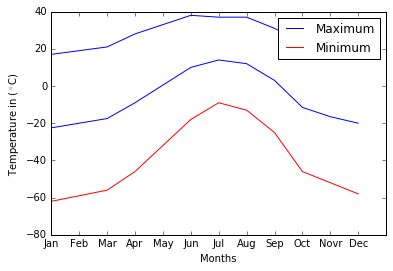

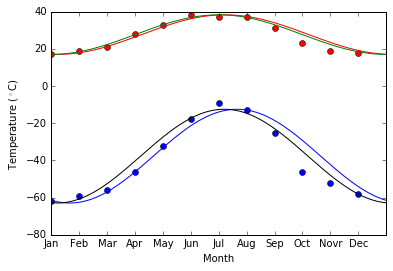

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


dates = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Novr','Dec']
months = np.arange(12)
days = np.linspace(0, 12, num=365)
#print(dates)
    
maximum = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minimum = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

i = 0
meanvalue = []
while i < np.size(maximum):
    meanvalue.append((maximum[i]+minimum[i])/2.)
    i += 1

    
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      maximum, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      minimum, [-40, 20, 0])


print(res_max,res_min)


plt.figure(1)   
plt.plot(meanvalue)
plt.plot(maximum,'b-',label='Maximum')
plt.plot(minimum,'r-',label='Minimum')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],dates)
plt.xlabel('Months')
plt.ylabel('Temperature in ($^\circ$C)')
plt.legend()

plt.figure(2)
plt.plot(months, maximum, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(days, yearly_temps(days,27.6292585 , -10.63955648, -0.001), 'g-')
plt.plot(months, minimum, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.plot(days, yearly_temps(days,-37.710752255 , -25.207124588, -0.2), 'k-')
plt.xlabel('Month')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],dates)
plt.ylabel('Temperature ($^\circ$C)')


plt.show()

## Solution exercice hard

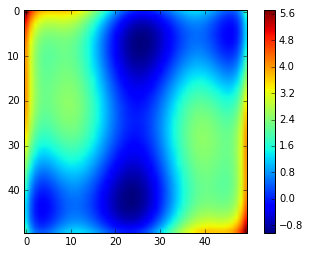

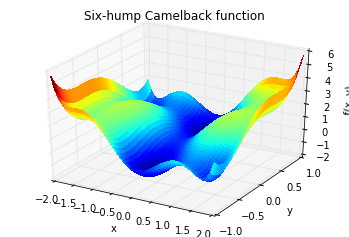

In [184]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)


plt.figure(1)  # simple visualization for use in tutorial
plt.imshow(sixhump([xg, yg]))
plt.colorbar()


fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

In [185]:
a


array([ 0.43509539,  0.6434335 ,  0.14108299,  1.29387089,  1.62502671,
        0.72753258,  0.10865894,  1.54288666,  1.79463806, -2.39706763,
        1.30446146,  1.36045045, -2.35542725,  0.11060919, -0.97003093,
        0.77549502,  0.02235318, -0.45780131, -0.81803001,  2.13423867,
        1.23044638,  0.17337574,  1.139043  , -0.51422305, -0.21078491,
        0.97206518,  0.78787869, -2.37780781, -0.70240161,  0.68909485,
        0.86469732,  2.1708985 , -1.1972964 , -0.14855563,  1.65912363,
       -2.22927028,  0.49651898,  0.92278477, -0.8112535 ,  1.66161686,
        0.32253929,  1.19044558, -0.49524767,  0.01001103,  1.87187962,
       -0.69621566, -1.02517319,  0.13479783, -0.93974838,  0.48862991,
        1.15893115, -0.23397781, -0.00677132, -0.51392379, -0.21233073,
       -0.7942119 ,  2.27954256,  0.7678537 ,  0.19332355, -0.30447308,
       -2.65995274,  0.97754932,  0.35011735,  0.18093291,  0.5237991 ,
        0.1445082 ,  0.38489054,  0.23199841, -0.34922507,  0.68